In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss


In [35]:
# Charger les données
chemin = "C:/Users/zineb/OneDrive/Bureau/hetic/DA/silver/data.csv"
df = pd.read_csv(chemin)







In [36]:
# Encoder les colonnes catégoriques avec LabelEncoder
label_encoders = {}
cat_columns = ['sector', 'product', 'sales_agent', 'regional_office', 'series', 'office_location', 'account', 'manager']

for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le




In [37]:
df.columns

Index(['account', 'account_id', 'account_name', 'Somme de close_value',
       'deal_stage', 'engage_at', 'manager', 'manager_id',
       'Somme de number_of_employees', 'office_location', 'opportunity_id',
       'product', 'product_id', 'product_name', 'regional_office',
       'Somme de revenue', 'sale_id', 'sales_agent', 'sales_price', 'sector',
       'series', 'Somme de year_founded_at', 'sale_id.1', 'close_at'],
      dtype='object')

In [38]:
# Définir les caractéristiques (X) et la cible (y)
X = df.drop(columns=['deal_stage', 'account_id', 'account_name', 'opportunity_id', 'sale_id','engage_at', 'product_id', 'product_name', 'sale_id', 
                     'Somme de close_value', 'Somme de year_founded_at', 'sale_id.1', 'close_at', 'manager_id'])
y = df['deal_stage']





In [39]:
# Encoder la cible
le_target = LabelEncoder()
y = le_target.fit_transform(y)



In [40]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [41]:
X.dtypes

account                           int32
manager                           int32
Somme de number_of_employees      int64
office_location                   int32
product                           int32
regional_office                   int32
Somme de revenue                float64
sales_agent                       int32
sales_price                     float64
sector                            int32
series                            int32
dtype: object

In [42]:
# Modèle de classification
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [43]:
# Prédictions
y_pred = model.predict(X_test)





In [44]:
# Évaluation
print("Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))
print("Précision globale :", accuracy_score(y_test, y_pred))



Rapport de classification :
              precision    recall  f1-score   support

    Engaging       1.00      0.25      0.40         8
        Lost       0.24      0.26      0.25        27
 Prospecting       0.00      0.00      0.00         1
         Won       0.61      0.66      0.63        64

    accuracy                           0.51       100
   macro avg       0.46      0.29      0.32       100
weighted avg       0.53      0.51      0.50       100

Précision globale : 0.51


C:\Users\zineb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\zineb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\zineb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

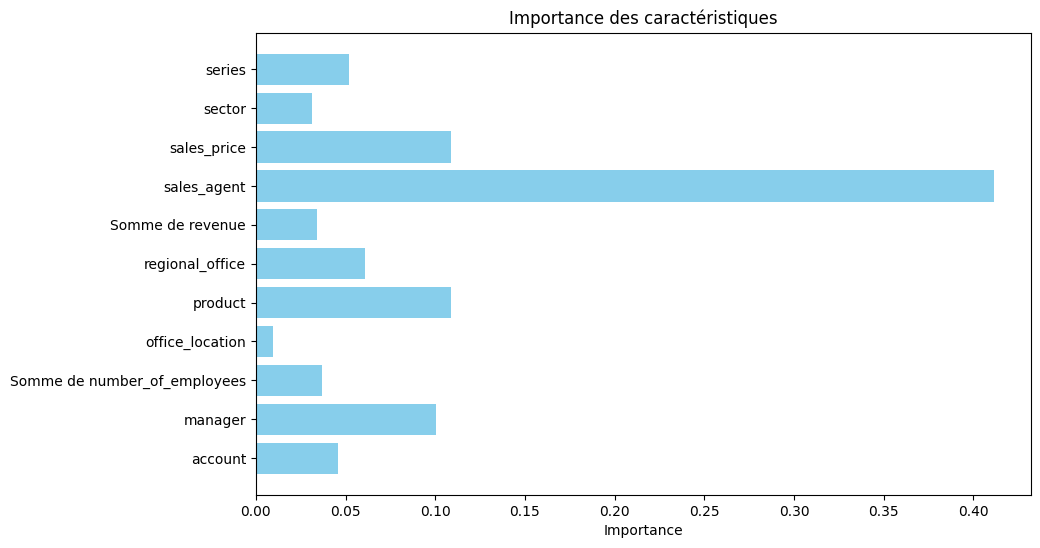

In [45]:
# Importances des caractéristiques
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Importance des caractéristiques")
plt.show()



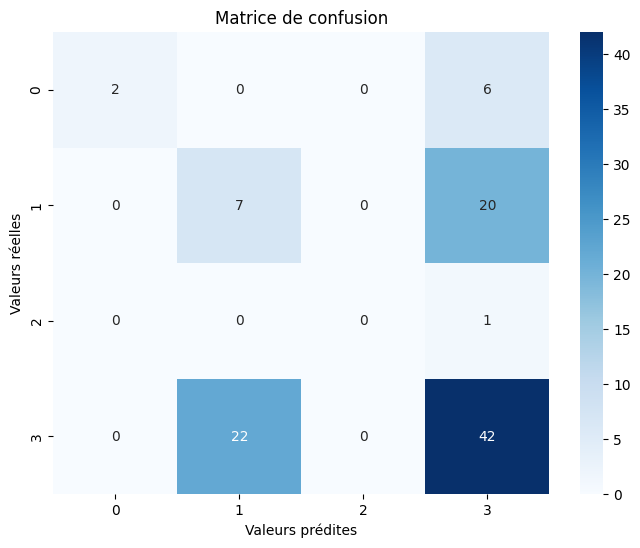

In [46]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion')
plt.show()



In [47]:
# Validation croisée
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nScores de validation croisée :", cv_scores)
print("Précision moyenne (validation croisée) :", np.mean(cv_scores))




Scores de validation croisée : [0.37 0.27 0.49 0.08 0.49]
Précision moyenne (validation croisée) : 0.33999999999999997


In [48]:

# Encodage des classes en valeurs numériques pour log loss
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_proba = model.predict_proba(X_test)

# Log Loss
log_loss_value = log_loss(y_test_encoded, y_pred_proba)
print("\nLog Loss :", log_loss_value)


Log Loss : 1.63447752011839
